Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

Reading data

In [2]:
data = pd.read_excel("Airlines+Data.xlsx")
data.head(5)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
data.shape

(96, 2)

In [4]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
data["Month"] = pd.to_datetime(data.Month,format="%b-%y")

In [6]:
data["month"] = data.Month.dt.strftime("%b") # month extraction
data["year"] = data.Month.dt.strftime("%Y") # year extraction

In [7]:
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [8]:
x = pd.get_dummies(data, columns=["month"])

In [9]:
data = pd.concat([x, data], axis=1)

In [10]:
data

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,Month,Passengers,month,year
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1995-01-01,112,Jan,1995
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,1995-02-01,118,Feb,1995
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,1995-03-01,132,Mar,1995
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,1995-04-01,129,Apr,1995
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,1995-05-01,121,May,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,2002-08-01,405,Aug,2002
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,2002-09-01,355,Sep,2002
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,2002-10-01,306,Oct,2002
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,2002-11-01,271,Nov,2002


In [11]:
data = data.T.drop_duplicates().T

In [12]:
data

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,Jan
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,Feb
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,Mar
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,Apr
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,Aug
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,Sep
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,Oct
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,Nov


In [13]:
t = pd.DataFrame({ 't' : range(1, 97 ,1)})
t

,t
0,1
1,2
2,3
3,4
4,5
...,...
91,92
92,93
93,94
94,95


In [14]:
data = pd.concat([data, t], axis= 1)

In [15]:
data

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month,t
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,Jan,1
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,Feb,2
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,Mar,3
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,Apr,4
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,Aug,92
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,Sep,93
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,Oct,94
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,Nov,95


In [16]:
data['t_square'] = data['t']**2

In [17]:
data.isnull().sum()

Month         0
Passengers    0
year          0
month_Apr     0
month_Aug     0
month_Dec     0
month_Feb     0
month_Jan     0
month_Jul     0
month_Jun     0
month_Mar     0
month_May     0
month_Nov     0
month_Oct     0
month_Sep     0
month         0
t             0
t_square      0
dtype: int64

In [18]:
data.astype({'Passengers': 'float'}).dtypes

Month         datetime64[ns]
Passengers           float64
year                  object
month_Apr             object
month_Aug             object
month_Dec             object
month_Feb             object
month_Jan             object
month_Jul             object
month_Jun             object
month_Mar             object
month_May             object
month_Nov             object
month_Oct             object
month_Sep             object
month                 object
t                      int64
t_square               int64
dtype: object

In [19]:
passengers = data['Passengers']
passengers

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: object

In [20]:
passengers = np.array(passengers, dtype=int)

In [21]:
log_ = np.log(passengers)

In [22]:
log = pd.DataFrame(log_)
log.columns = ['log']

In [23]:
data = pd.concat([data, log], axis= 1)

In [24]:
data

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month,t,t_square,log
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,Jan,1,1,4.718499
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,Feb,2,4,4.770685
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,Mar,3,9,4.882802
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,Apr,4,16,4.859812
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,May,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,Aug,92,8464,6.003887
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,Sep,93,8649,5.872118
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,Oct,94,8836,5.723585
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,Nov,95,9025,5.602119


In [25]:
data.dtypes

Month         datetime64[ns]
Passengers            object
year                  object
month_Apr             object
month_Aug             object
month_Dec             object
month_Feb             object
month_Jan             object
month_Jul             object
month_Jun             object
month_Mar             object
month_May             object
month_Nov             object
month_Oct             object
month_Sep             object
month                 object
t                      int64
t_square               int64
log                  float64
dtype: object

In [26]:
data[['Passengers']] = data[['Passengers']].apply(pd.to_numeric)

In [27]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
year                  object
month_Apr             object
month_Aug             object
month_Dec             object
month_Feb             object
month_Jan             object
month_Jul             object
month_Jun             object
month_Mar             object
month_May             object
month_Nov             object
month_Oct             object
month_Sep             object
month                 object
t                      int64
t_square               int64
log                  float64
dtype: object

In [29]:
data.columns

Index(['Month', 'Passengers', 'year', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'month', 't',
       't_square', 'log'],
      dtype='object')

<Axes: >

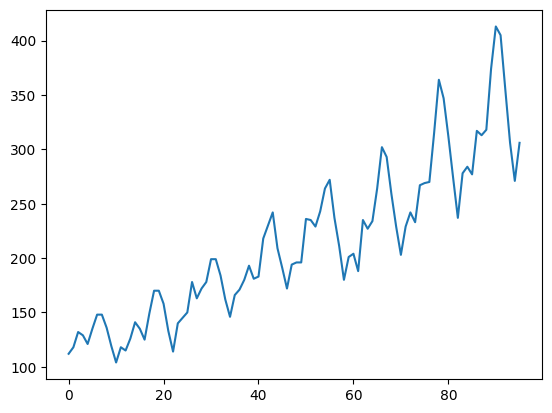

In [30]:
#line plot
data.Passengers.plot()

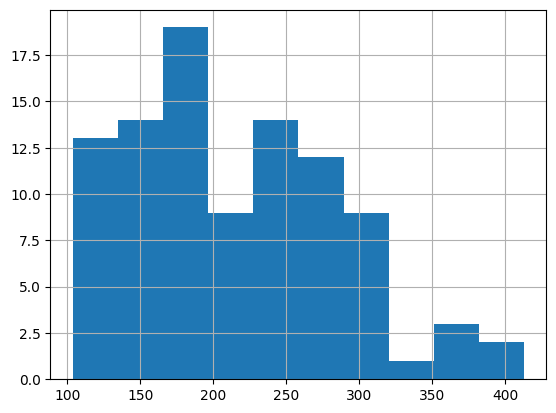

In [31]:
# histogram plot
data.Passengers.hist()
plt.show()

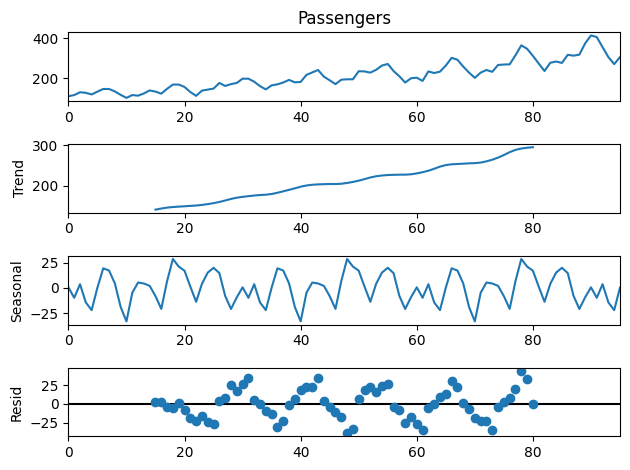

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=30)
decompose_ts_add.plot()
plt.show()

In [34]:
Train = data.head(70)
Test = data.tail(26)

In [35]:
#Linear Model

linear_model = smf.ols('Passengers ~ t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.30985585336206

In [36]:
#Exponential

Exp = smf.ols('log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.47847070446902

In [37]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.89814496742493

In [38]:
#Additive seasonality

add_sea = smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[[ 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

124.97569951828822

In [39]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_square+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[[ 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.39304289589942

In [40]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

129.62914476526294

In [41]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log~t+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.724791415288434

In [42]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.724791
4,rmse_add_sea_quad,30.393043
1,rmse_Exp,43.478471
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
5,rmse_Mult_sea,129.629145


#inference = model 6 is the best model.